# Data analysis with t-Tests and distributions

## The Story of Dr. Ignaz Semmelweis

You are stepping into the role of **Dr. Ignaz Semmelweis**, a Hungarian physician born in 1818 who worked at the Vienna General Hospital. In this historical era, the causes of disease were mysterious: people often blamed "bad air" or evil spirits, as knowledge about bacteria, germs, and viruses was nonexistent.

<img src="https://i.imgur.com/gugIA5r.png" width=700>

By the 1800s, however, scientific thinking and the use of data were on the rise in medicine. Dr. Semmelweis noticed a disturbing pattern-a high number of women in maternity wards were dying from **childbed fever** ([puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)). Determined to understand the cause, he set out to find evidence using **data analysis**.

<img src=https://i.imgur.com/lSyNUwR.png width=700>
Today you will become Dr Semmelweis. This is your office 👆. You will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

---

## The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

---

## Learning Objectives

In this notebook, you will explore:

- Making a compelling argument using data
- Superimposing histograms to compare distributions
- Using Kernel Density Estimates (KDE) to represent distributions
- Testing for statistical significance with `scipy` and interpreting p-values
- Highlighting segments in Matplotlib time series charts
- Configuring and using legends in Matplotlib
- Processing elements conditionally with `numpy.where()`

---

# Setup
lets import the required libraries.

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [3]:
df_yearly = pd.read_csv('data/annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('data/monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration

You (aka Dr. Semmelweis) are working at Vienna General Hospital. Let’s take a closer look at the data you've collected on the number of births and maternal deaths throughout the 1840s.

## Challenge 1: Preliminary Data Exploration

- What is the shape of `df_yearly` and `df_monthly`? How many rows and columns?
- What are the column names?
- Which years are included in the dataset?
- Are there any NaN values or duplicates?
- What were the average number of births that took place per month?
- What were the average number of deaths that took place per month?

In [4]:
# view the data
display(df_yearly.head())
display(df_monthly.head())

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [5]:
# shapes of dfs
df_yearly.shape, df_monthly.shape

((12, 4), (98, 3))

In [7]:
# what are columns 
display(df_yearly.columns)
df_monthly.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

Index(['date', 'births', 'deaths'], dtype='object')

### Check for Nan Values and Duplicates

In [8]:
# are there any nan values
display(df_yearly.isna().values.any())
df_monthly.isna().values.any()

np.False_

np.False_

In [9]:
# check for duplicates
display(df_yearly.duplicated().values.any())
df_monthly.duplicated().values.any()

np.False_

np.False_

### Descriptive Statistics
To check the average number of births/deaths 

In [10]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [11]:
df_monthly.describe()

,date,births,deaths
count,98,98.00,98.00
mean,1845-02-11 04:24:29.387755008,267.00,22.47
min,1841-01-01 00:00:00,190.00,0.00
25%,1843-02-08 00:00:00,242.50,8.00
50%,1845-02-15 00:00:00,264.00,16.50
75%,1847-02-22 00:00:00,292.75,36.75
max,1849-03-01 00:00:00,406.00,75.00
std,NaN,41.77,18.14


## Challenge 2: Percentage of Women Dying in Childbirth

- How dangerous was childbirth in the 1840s in Vienna?
- Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.
- For comparison, the United States recorded 18.5 maternal deaths per 100,000 (0.018%) in 2013 [(source)](https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009).

In [21]:
df_yearly['deaths_pct'] = df_yearly.deaths / df_yearly.births * 100

In [22]:
df_yearly.head()

,year,births,deaths,clinic,deaths_pct
0,1841,3036,237,clinic 1,7.81
1,1842,3287,518,clinic 1,15.76
2,1843,3060,274,clinic 1,8.95
3,1844,3157,260,clinic 1,8.24
4,1845,3492,241,clinic 1,6.90


In [23]:
print(f'Chances of dying in the 1840s in Vienna: {df_yearly.deaths_pct.mean():.3}%')

Chances of dying in the 1840s in Vienna: 6.95%


Childbirth was very risky! About 7.08% of women died 💀 in the 1840s (compared to 0.018% in the US in 2013).

---

## Challenge 3: Visualise the Total Number of Births 🤱 and Deaths 💀 Over Time

* Create a [Matplotlib chart](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes. It should look something like this:

<img src=https://i.imgur.com/F9DOJxx.png width=700>

* Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively. 
* Do you notice anything in the late 1840s?

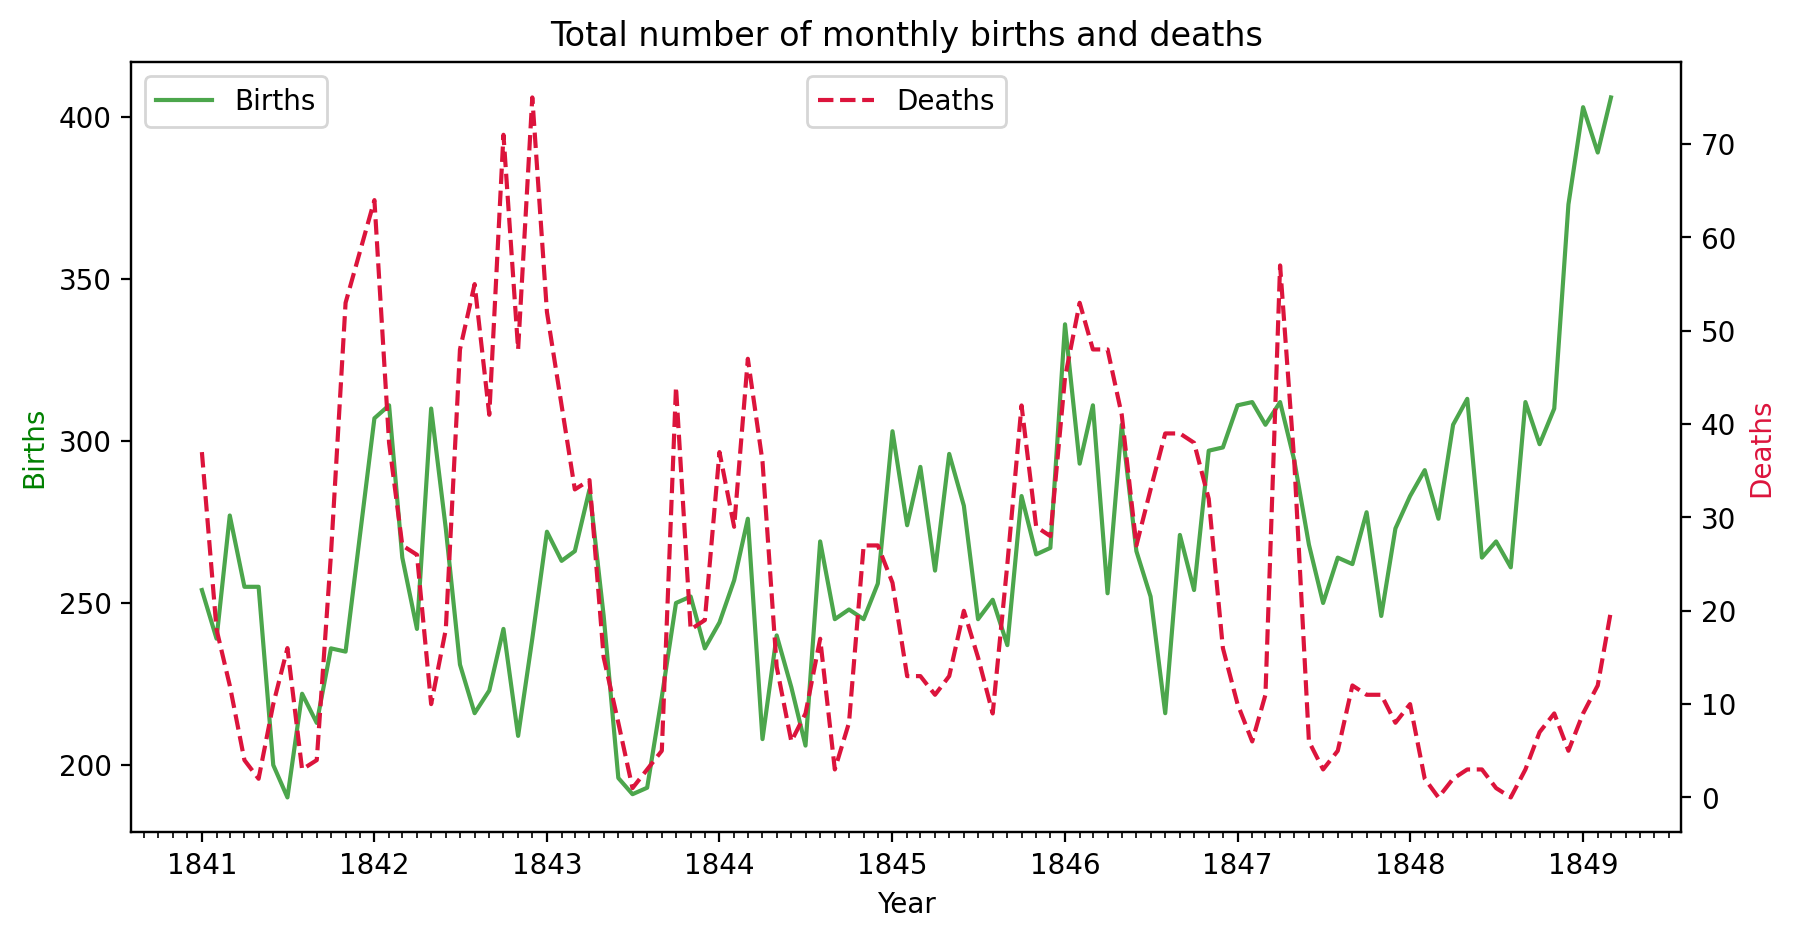

In [38]:
plt.figure(figsize=(10, 5), dpi=200)
plt.title("Total number of monthly births and deaths")
plt.xlabel("Year")
plt.ylabel("Births", color='green')
plt.plot(
    df_monthly.date,
    df_monthly.births,
    c='green',
    label="Births",
    alpha=0.7
)
plt.legend()
ax = plt.gca().twinx()
ax.plot(
    df_monthly.date,
    df_monthly.deaths,
    c='crimson',
    label='Deaths',
linestyle='--'
)
ax.legend(loc='upper center')
ax.set_ylabel("Deaths", color='crimson')

# Now lets apply formating on x axis
years = mdates.YearLocator()       # Major ticks every year
months = mdates.MonthLocator()     # Minor ticks every month
years_fmt = mdates.DateFormatter('%Y')  # Format major ticks as four-digit years
ax.xaxis.set_major_locator(years)          # Set major ticks to years
ax.xaxis.set_major_formatter(years_fmt)    # Format major ticks as years (e.g., 1845)
ax.xaxis.set_minor_locator(months)          # Set minor ticks to months

plt.show()

From this visualization, note that **after 1847**, deaths dropped significantly, despite an increasing number of births! 🤔

# Analysing the Yearly Data Split By Clinic

Welcome back to the Vienna General Hospital. There are two maternity wards:  
- **Clinic 1**: Staffed by all-male doctors and medical students  
- **Clinic 2**: Staffed by female midwives  

---

## Challenge 1: The Yearly Data Split by Clinic

- Use Plotly to create line charts showing births and deaths for each clinic over the years.
- Which clinic is bigger or busier, judging by the number of births?
- Has the hospital seen an increase in patients over time?
- What was the highest number of deaths recorded in clinic 1 and clinic 2?

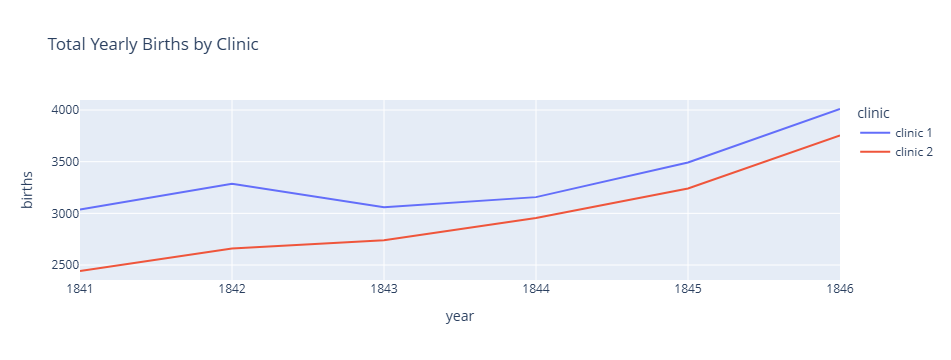

In [43]:
fig = px.line(
    data_frame=df_yearly,
    x='year',
    y='births',
    color='clinic',
    title='Total Yearly Births by Clinic'
)

fig.show()

Observations:  
- The number of births increased over the years at the hospital.  
- **Clinic 1**, staffed by male doctors and students, was busier and larger with more births than Clinic 2.  
- More people were born in Clinic 1, and correspondingly, more deaths occurred there.



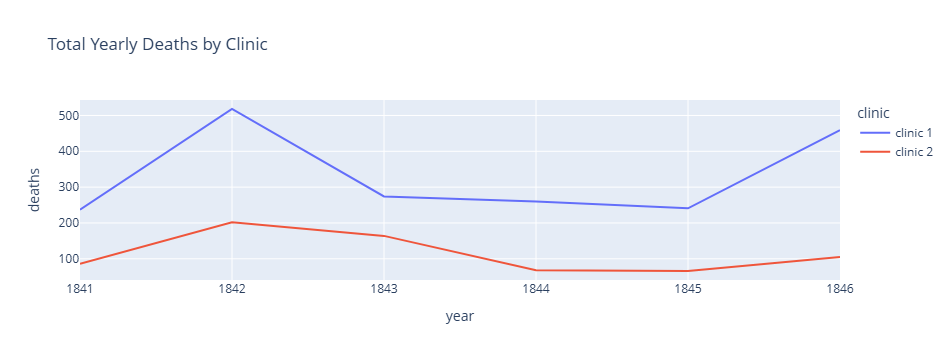

In [44]:
fig = px.line(
    data_frame=df_yearly,
    x='year',
    y='deaths',
    color='clinic',
    title='Total Yearly Deaths by Clinic'
)

fig.show()


To fairly compare, proportions of deaths per clinic need to be examined next.

---

## Challenge 2: Calculate the Proportion of Deaths at Each Clinic

- Add a "pct_deaths" column to calculate the percentage of deaths per birth for each row in `df_yearly`.
- Calculate the average maternal death rate for Clinic 1 and Clinic 2 over the entire period.
- Create a Plotly line chart to visualize how the death rate percentage varies over the years for each clinic.
- Which clinic has a higher death proportion?
- What is the highest monthly death rate in Clinic 1 compared to Clinic 2?

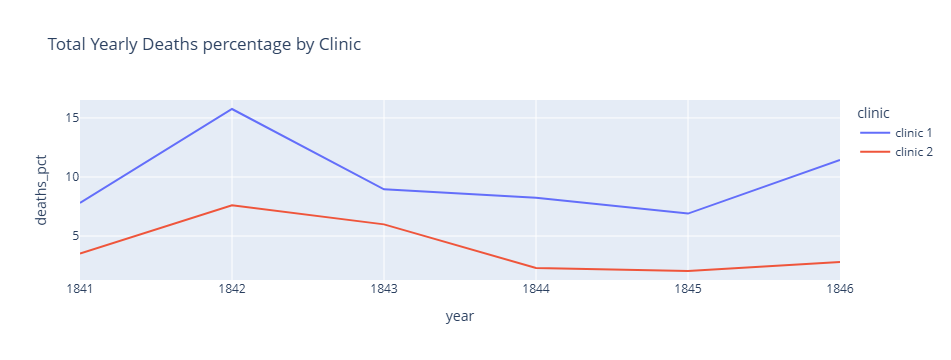

In [46]:
fig = px.line(
    data_frame=df_yearly,
    x='year',
    y='deaths_pct',
    color='clinic',
    title='Total Yearly Deaths percentage by Clinic'
)

fig.show()

In [47]:
df_yearly.groupby('clinic').agg({'deaths_pct': 'mean'})

,deaths_pct
clinic,
clinic 1,9.85
clinic 2,4.04



Notes:  
- 1842 was a particularly deadly year, with about **16% deaths in Clinic 1** and **7.6% in Clinic 2**.  
- Clinic 2 consistently had a **lower death rate** than Clinic 1, which puzzled Dr. Semmelweis greatly.

---

## The Story Continues...

- Initially, Semmelweis hypothesized that the **birthing position** caused the difference: Clinic 2 women gave birth on their sides, Clinic 1 women on their backs. Changing Clinic 1 to side births had **no effect** on death rates.
- Next, he noticed that when someone died, a priest walked through Clinic 1 ringing a bell, potentially frightening women. Redirecting the priest to stop bell ringing also had **no effect**.
- Frustrated, Semmelweis went on holiday. Upon return, he learned a pathologist colleague died after pricking his finger during an autopsy on a childbed fever victim.
- Semmelweis realized that **childbed fever could infect anyone**, including doctors and students.
- This led to his breakthrough theory: doctors and students carried **contagious particles from cadavers** on their hands during autopsies and transmitted them to women during delivery in Clinic 1.


# The Effect of Handwashing

In June 1846, Dr. Semmelweis ordered mandatory handwashing with a chlorine (instead of water) solution for all medical staff to disinfect hands and instruments, unknowingly adopting one of the most effective disinfectants. This was initially to remove foul smells from autopsies, long before the knowledge of germs and bacteria.

---

## Challenge 1: The Effect of Handwashing

- Add a "pct_deaths" column to `df_monthly` with the percentage of deaths per birth for each row.
- Create two subsets of `df_monthly`: before and after Dr. Semmelweis ordered handwashing.
- Calculate the average death rate before June 1846.
- Calculate the average death rate after June 1846.

In [48]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

In [50]:
# lets add the percentage column
df_monthly['deaths_pct'] = df_monthly.deaths / df_monthly.births * 100
df_monthly.head()

,date,births,deaths,deaths_pct
0,1841-01-01,254,37,14.57
1,1841-02-01,239,18,7.53
2,1841-03-01,277,12,4.33
3,1841-04-01,255,4,1.57
4,1841-05-01,255,2,0.78


In [51]:
# lets convert the date time data type
df_monthly.date = pd.to_datetime(df_monthly.date, "%Y")
df_monthly.head()

,date,births,deaths,deaths_pct
0,1841-01-01,254,37,14.57
1,1841-02-01,239,18,7.53
2,1841-03-01,277,12,4.33
3,1841-04-01,255,4,1.57
4,1841-05-01,255,2,0.78


In [53]:
# lets split the dataframe
df_monthly_after = df_monthly[df_monthly.date >= handwashing_start]
df_monthly_before = df_monthly[df_monthly.date < handwashing_start]

In [54]:
df_monthly_after.deaths_pct.mean()

np.float64(2.1093375097254534)

In [55]:
df_monthly_before.deaths_pct.mean()

np.float64(10.504998260908787)

The death rate dropped dramatically after handwashing started, from approximately **10.51%** to **2.11%**.

---

## Challenge 2: Calculate a Rolling Average of the Death Rate

- Calculate the 6-month rolling average death rate prior to mandatory handwashing.
- Set the date column as index to prevent it being dropped during rolling calculations.

In [ ]:
# Make date column index
df_monthly_before.set_index('date', inplace=True)    

In [66]:
# Calculate rolling mean with a window of 6 observations
roll_df_before = df_monthly_before.rolling(window=6).mean()

In [67]:
roll_df_before.head()

,births,deaths,deaths_pct
date,,,
1841-01-01,NaN,NaN,NaN
1841-02-01,NaN,NaN,NaN
1841-03-01,NaN,NaN,NaN
1841-04-01,NaN,NaN,NaN
1841-05-01,NaN,NaN,NaN


## Challenge 3: Highlighting Subsections of a Line Chart

-  Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

<img src=https://i.imgur.com/X6TQe0R.png width=500>

- Add three lines:
  - Monthly death rate before handwashing (thin, dashed black line)
  - 6-month moving average before handwashing (thicker, crimson dashed line)
  - Monthly death rate after handwashing (skyblue line with round markers)
- Show the monthly death rate before handwashing as a thin dashed black line. 
- Show the moving average as a thicker, crimon line.
- Show the rate after handwashing as a skyblue line with round markers. 
- Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

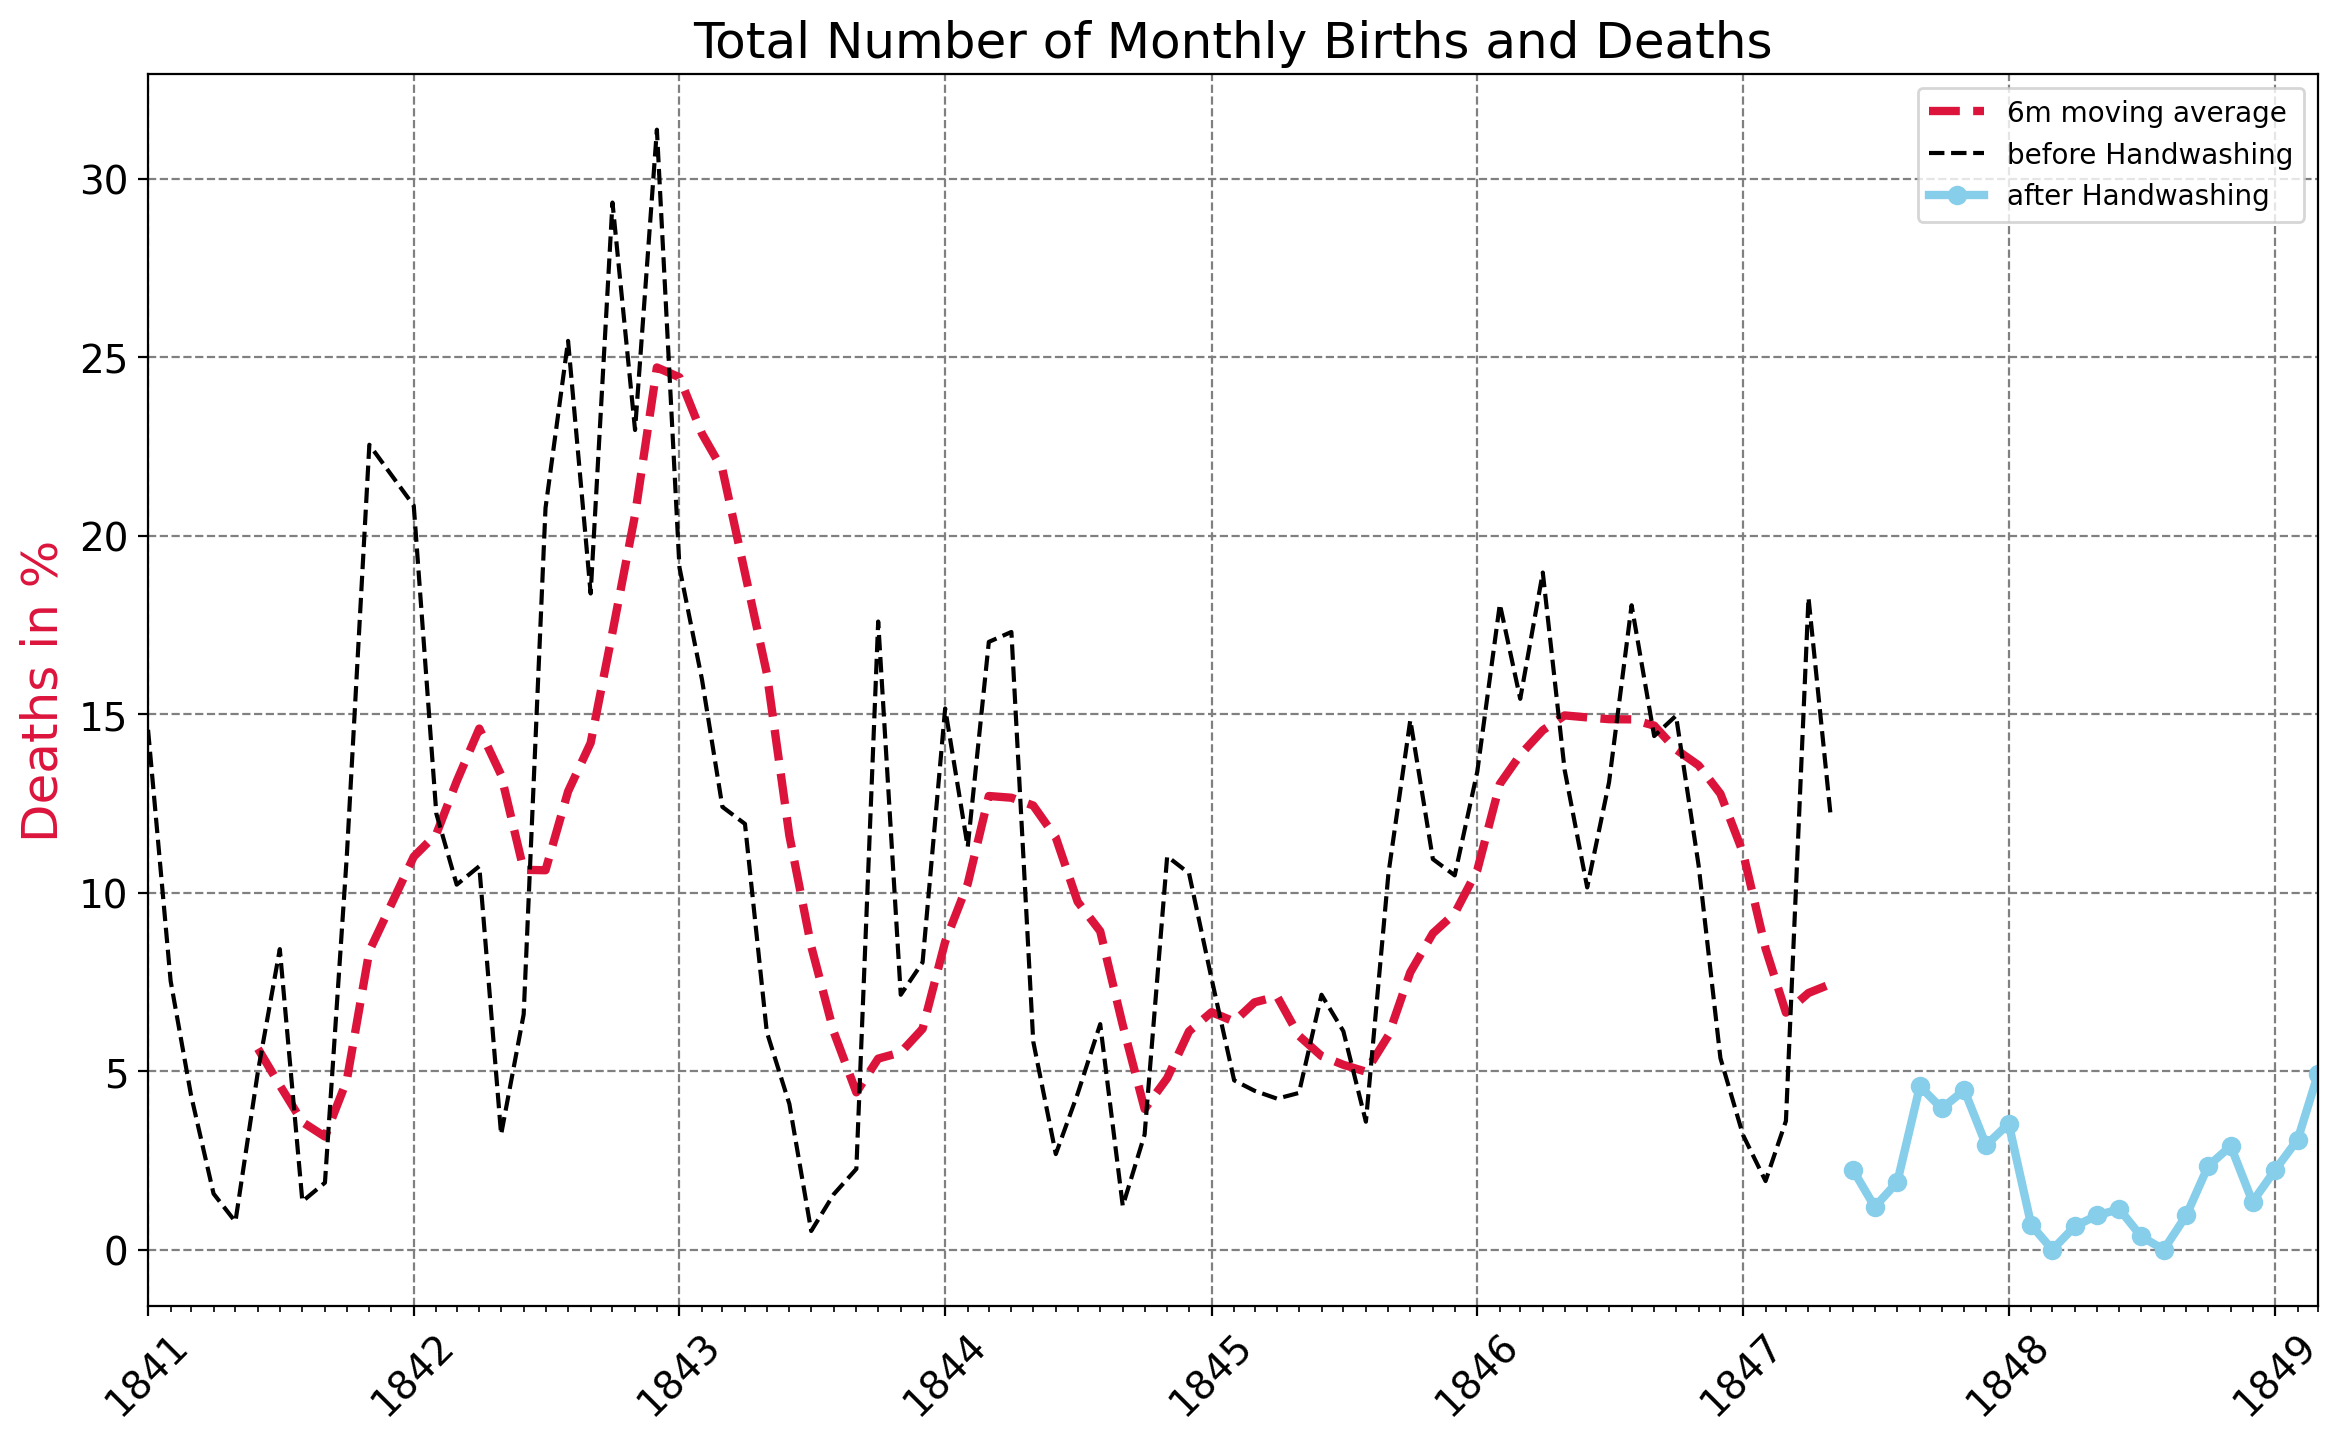

In [86]:
# Use these locators in the chart:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.ylabel('Deaths in %', color='crimson', fontsize=18)

plt.xlim([df_monthly.date.min(), df_monthly.date.max()])

ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.grid(color='grey', linestyle='--')

# Before roll
plt.plot(
    roll_df_before.index,
    roll_df_before.deaths_pct,
    color='crimson',
    linewidth=3,
    linestyle='--',
    label='6m moving average'
)

# Before monthly 
plt.plot(
    df_monthly_before.index,
    df_monthly_before.deaths_pct,
    color='black',
    linestyle='--',
    label='before Handwashing'
)

# After hand wash
plt.plot(
    df_monthly_after.date,
    df_monthly_after.deaths_pct,
    color='skyblue',
    marker='o',
    linewidth=3,
    label='after Handwashing'
)


plt.legend()
plt.show()

This visualization clearly shows the significant drop in death rates after the introduction of handwashing, demonstrating the profound effect of this simple hygiene intervention.

# Visualising Distributions and Testing for Statistical Significance

Dr. Semmelweis can make even more convincing arguments about the benefits of handwashing by analyzing statistics and creating compelling visualizations.

---

## Challenge 1: Calculate the Difference in the Average Monthly Death Rate

* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier? 
* How many times lower are the chances of dying after handwashing compared to before?

In [90]:
# lets average % of deaths before handwashing
df_monthly_before.deaths_pct.mean()

np.float64(10.504998260908787)

In [91]:
# lets average % of deaths after handwashing
df_monthly_after.deaths_pct.mean()

np.float64(2.1093375097254534)

Handwashing decreased the average death rate from **10.5% to 2.11%**, a fivefold improvement. 😮

---

## Challenge 2: Using Box Plots to Show How the Death Rate Changed

* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing. 
* Then use plotly to create box plot of the data before and after handwashing. 
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?


In [93]:
handwashing_start

Timestamp('1847-06-01 00:00:00')

In [96]:
# lets add a column with value 'Yes' if it is after 1847 else 'No'
df_monthly['handwash'] = np.where(df_monthly.date > handwashing_start, "Yes", "No")

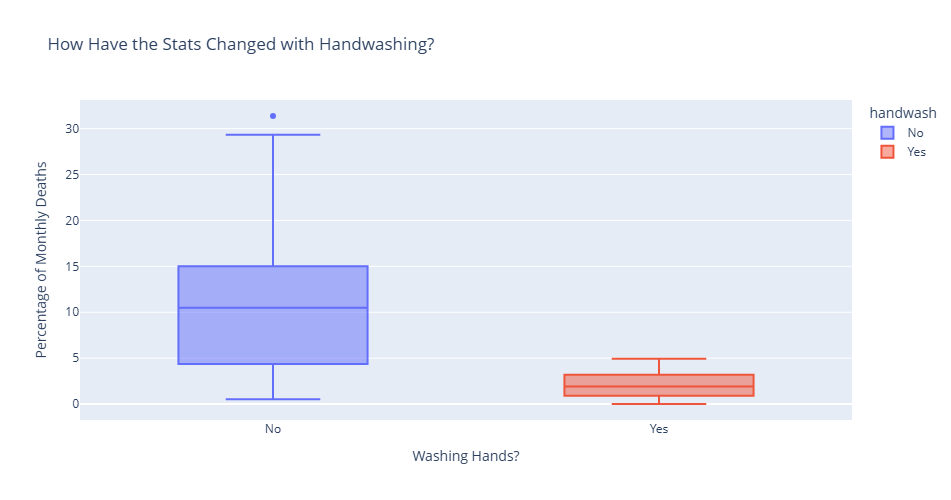

In [103]:
box = px.box(
        data_frame=df_monthly,
        x='handwash',
        y='deaths_pct',
        color='handwash',
        height=500,
        title='How Have the Stats Changed with Handwashing?',
    )
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
 
box.show()

The plot shows us the same data as our Matplotlib chart, but from a different perspective. Here we also see the massive spike in deaths in late 1842. Over 30% of women who gave birth that month died in hospital. What we also see in the box plot is how not only did the average death rate come down, but so did the overall range - we have a lower max and 3rd quartile too. Let's take a look at a histogram to get a better sense of the distribution.

---

## Challenge 3: Use Histograms to Visualise the Monthly Distribution

* Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths. 
* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm='percent'` to make the time periods comparable. 
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter.

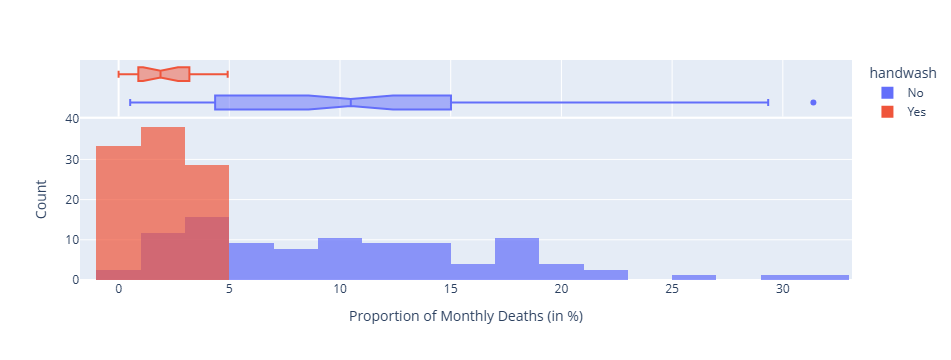

In [110]:
hist = px.histogram(
    data_frame=df_monthly,
    x='deaths_pct',
    # y='',
    color='handwash',
    nbins=30,
    histnorm='percent',
    opacity=.7,
    marginal='box',   # this will show box plot  on the top
    barmode='overlay'
)
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths (in %)',
                   yaxis_title='Count',)
hist.show()

Though the histogram looks jagged with relatively few points, it nicely shows the distribution shift after handwashing.

---

## Challenge 4: Use a Kernel Density Estimate (KDE) for Smoother Distributions

* Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after. 
* Use the `shade=True` parameter to give your two distributions different colours. 
* What weakness in the chart do you see when you just use the default parameters?
* Address negative left-tail values (impossible for death rates) with `clip=(0,100)`. 

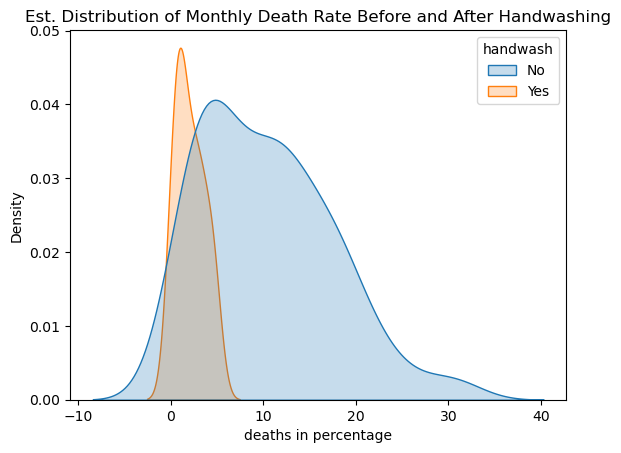

In [115]:
sns.kdeplot(
    data=df_monthly,
    x='deaths_pct',
    hue='handwash',
    fill=True,   # this will fill some shading below the kde curve
           )
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlabel('deaths in percentage')
plt.show()

However, the problem is that we end up with a negative monthly death rate on the left tail. The doctors would be very surprised indeed if a corpse came back to life after an autopsy! 🧟‍♀️

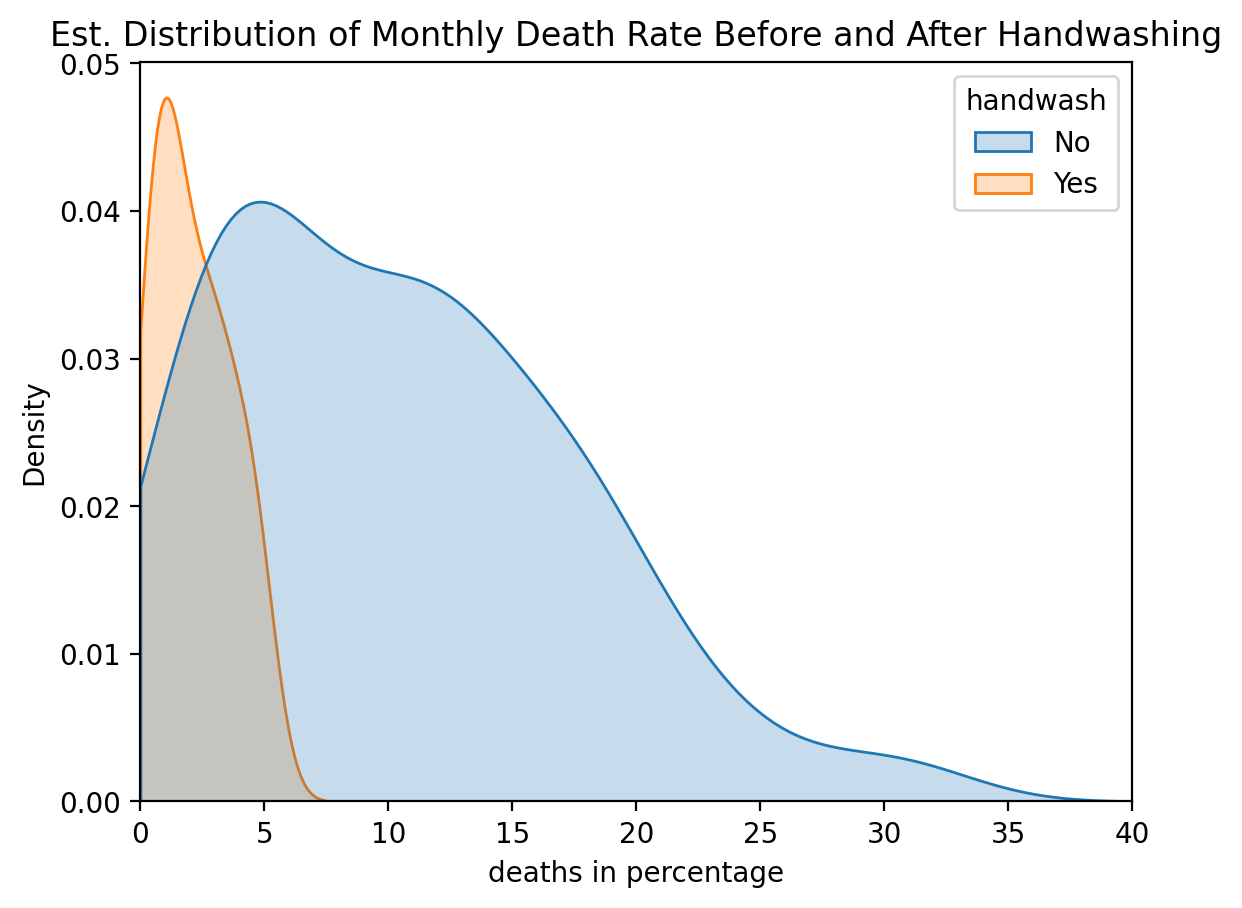

In [118]:
plt.figure(dpi=200)
sns.kdeplot(
    data=df_monthly,
    x='deaths_pct',
    hue='handwash',
    fill=True,   # this will fill some shading below the kde curve
    clip=(0, 100)  # This tells Do not evaluate the density outside of these limits. 
)

plt.xlim(0, 40)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlabel('deaths in percentage')
plt.show()

Now that we have an idea of what the two distributions look like, we can further strengthen our argument for handwashing by using a statistical test. We can test whether our distributions ended up looking so different purely by chance (i.e., the lower death rate is just an accident) or if the 8.4% difference in the average death rate is statistically significant.

---

## Challenge 5: Use a T-Test to Show Statistical Significance

* Import `stats` from `scipy`.
* Use the [`.ttest_ind()` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level? 


In [119]:
from scipy import stats

In [126]:
# a and b are the two independent samples that we want to compare statistically.
a = df_monthly_before.deaths_pct
b = df_monthly_after.deaths_pct 

In [127]:
stats.ttest_ind(
    a=a, 
    b=b
)

TtestResult(statistic=np.float64(5.511607211341914), pvalue=np.float64(2.9854365567245336e-07), df=np.float64(96.0))

In [128]:
t_stat, p_value = stats.ttest_ind(a=a, b=b)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002985
t-statstic is 5.512


The p-value (~0.00000002985) is far below 0.01, confirming with very high confidence that handwashing caused a genuine reduction in maternal deaths. 😊

What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>